# **Edge Detection**

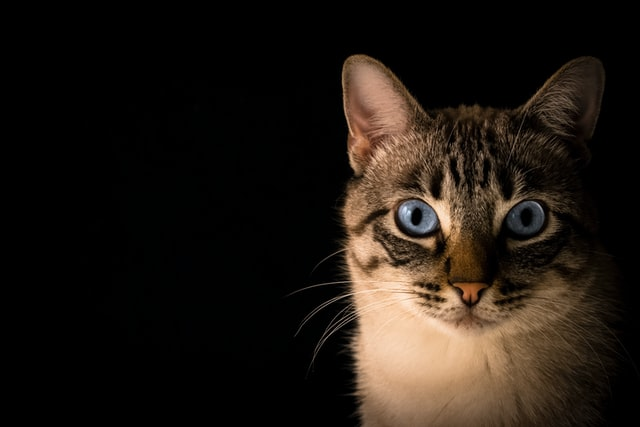

In [1]:
import cv2 as cv
from io import BytesIO
import requests
import numpy as np
from google.colab.patches import cv2_imshow # Import the Colab specific display function


# Construct the raw content URL for the image
image_url = "https://raw.githubusercontent.com/jasmcaus/opencv-course/master/Resources/Photos/cat.jpg"
# Download the image data
response = requests.get(image_url)
image_bytes = BytesIO(response.content)
# Read the image using OpenCV or Caer
# Using OpenCV
# Reset the BytesIO object's position to the beginning before reading again
image_bytes.seek(0)
image_np = np.frombuffer(image_bytes.read(), np.uint8)
img_cv = cv.imdecode(image_np, cv.IMREAD_COLOR)
# Display the image using the Colab specific function
cv2_imshow(img_cv)

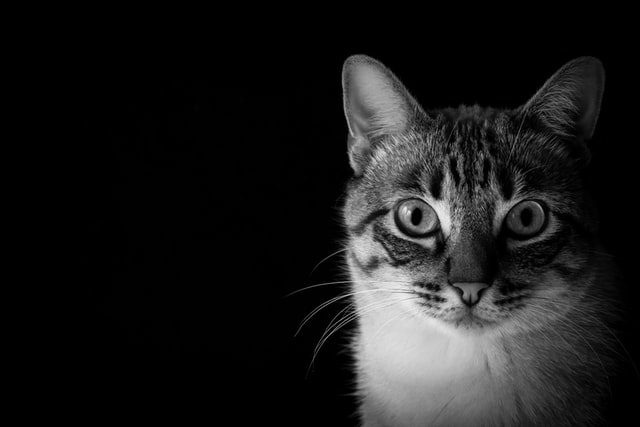

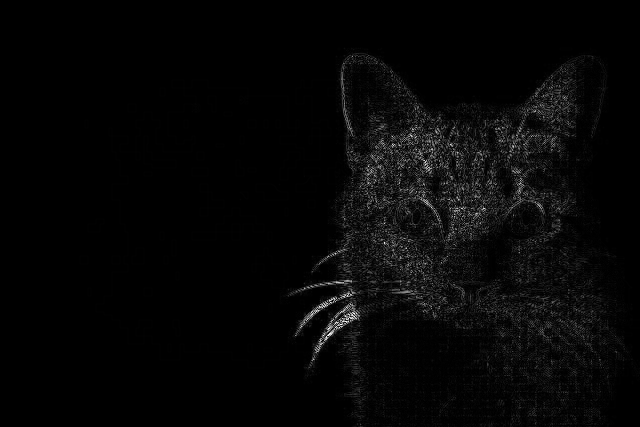

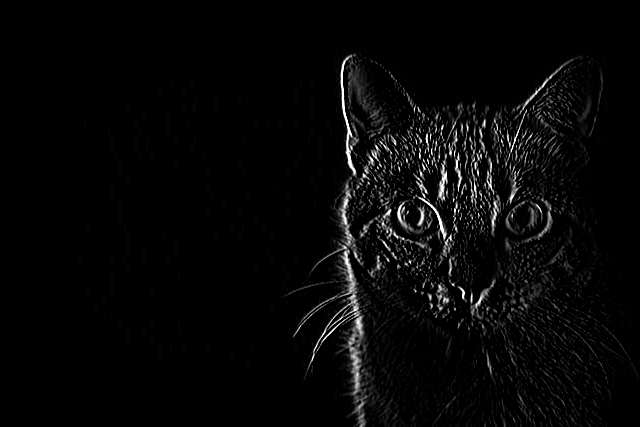

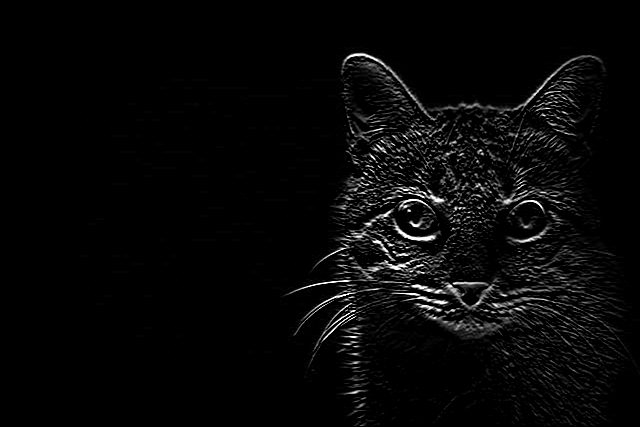

/usr/local/lib/python3.11/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


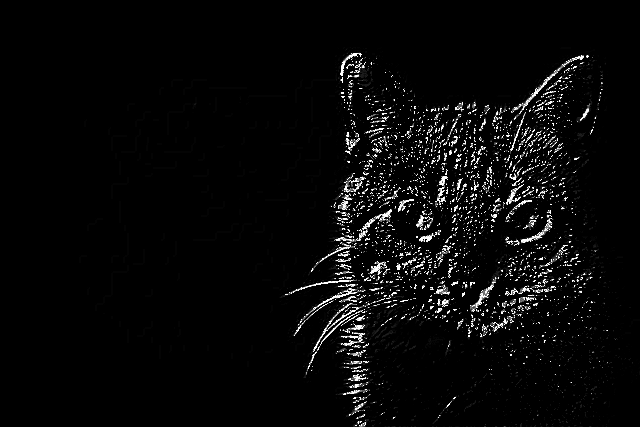

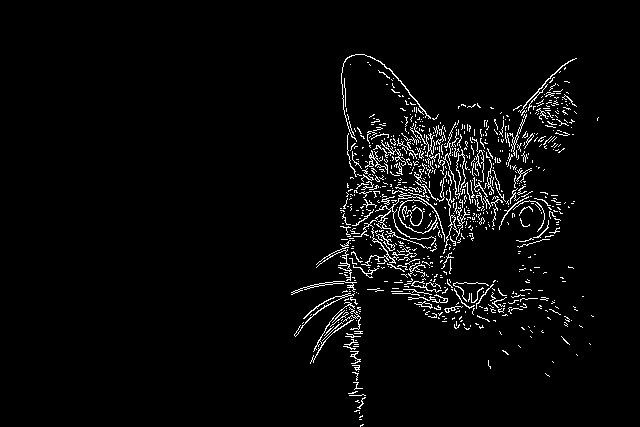

-1

In [2]:
# Edges / Gradients

gray = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

# Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv2_imshow(sobelx)
cv2_imshow(sobely)
cv2_imshow(combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv2_imshow(canny)
cv.waitKey(0)

# **Face Detection**

In [3]:
haar_face_url = "https://robotics.hochschule-rhein-waal.de/gitlab/23496/Python/-/raw/ad1246a3858b31471dbb183aaaf770c253ae85b0/OpenCV/haar_face.xml"
response = requests.get(haar_face_url)

# Save the content to a local file
with open('haar_face.xml', 'wb') as f:
    f.write(response.content)

face


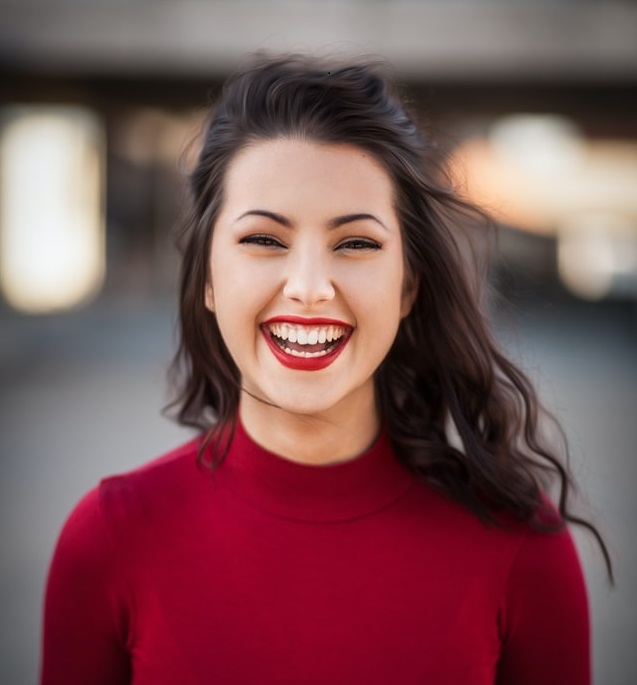

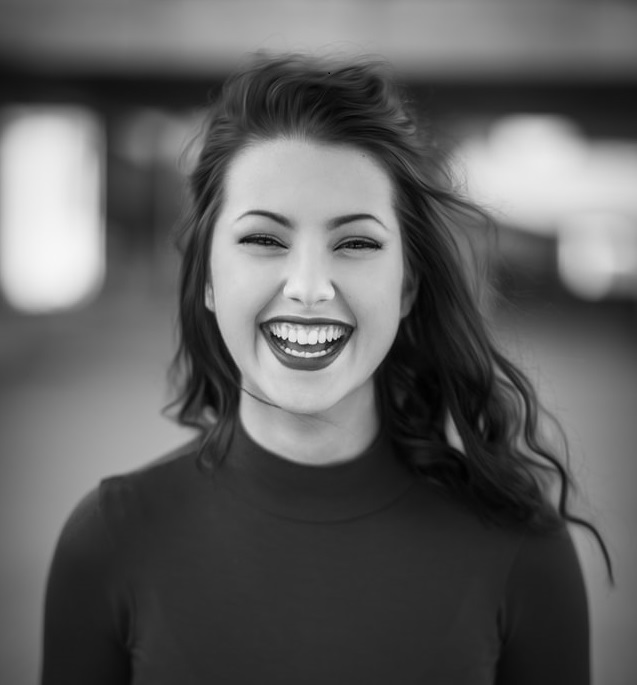

Number of faces found = 2


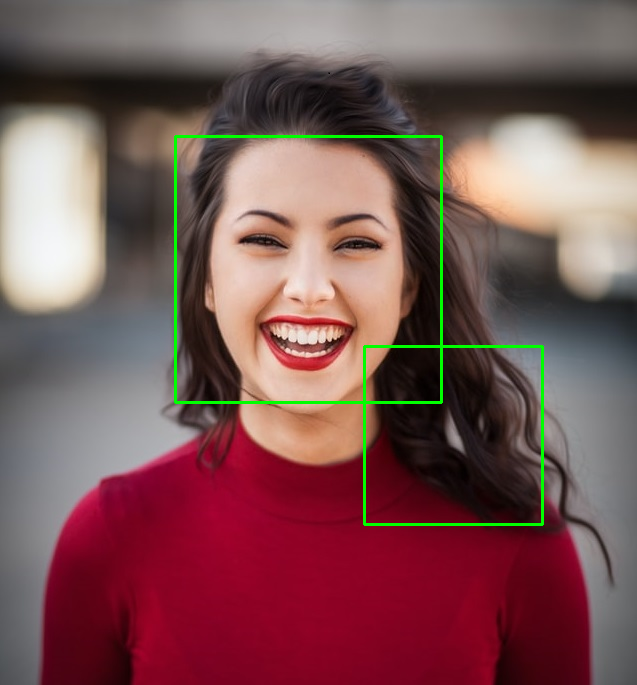

-1

In [6]:
image_url = "https://raw.githubusercontent.com/jasmcaus/opencv-course/master/Resources/Photos/lady.jpg"
# Download the image data
response = requests.get(image_url)
image_bytes = BytesIO(response.content)
# Read the image using OpenCV or Caer
# Reset the BytesIO object's position to the beginning before reading again
image_bytes.seek(0)
image_np = np.frombuffer(image_bytes.read(), np.uint8)
img_cv = cv.imdecode(image_np, cv.IMREAD_COLOR)
# Display the image using the Colab specific function
print("face")
cv2_imshow(img_cv)

gray = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img_cv, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv2_imshow(img_cv)

cv.waitKey(0)

face


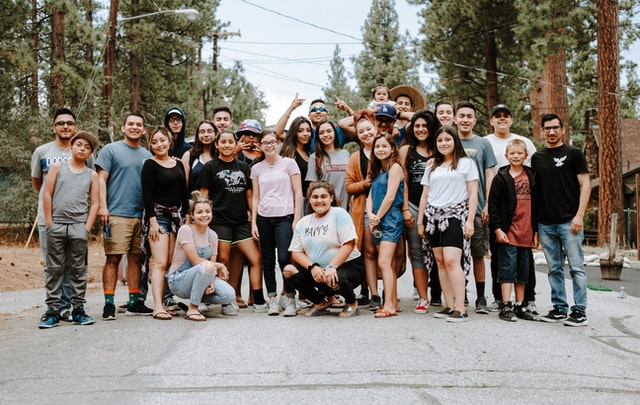

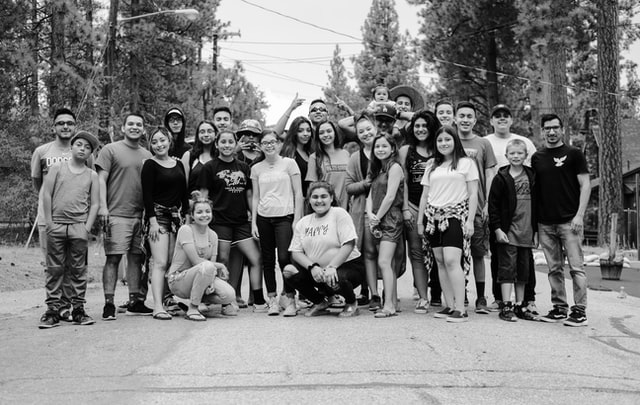

Number of faces found = 19


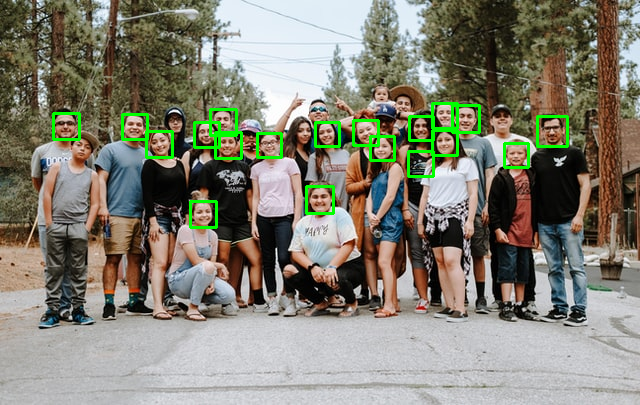

-1

In [8]:
#group version
image_url = "https://raw.githubusercontent.com/jasmcaus/opencv-course/master/Resources/Photos/group%201.jpg"

# Download the image data
response = requests.get(image_url)
image_bytes = BytesIO(response.content)
# Read the image using OpenCV or Caer
# Reset the BytesIO object's position to the beginning before reading again
image_bytes.seek(0)
image_np = np.frombuffer(image_bytes.read(), np.uint8)
img_cv = cv.imdecode(image_np, cv.IMREAD_COLOR)
# Display the image using the Colab specific function
print("face")
cv2_imshow(img_cv)

gray = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img_cv, (x,y), (x+w,y+h), (0,255,0), thickness=2)

cv2_imshow(img_cv)

cv.waitKey(0)